## Heart Disease Research
In this project, I reviewed and analyzed data from a sample of patients evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

We will study a number of **quantitative, binary, and categorical variables**, produce **boxplots**, and utilize **hypothesis testing** to better understand the relationships between the variables. 

#### Focus Areas for Analysis
- Determine whether there is an association between people with heart disease and another healther indicator such as high cholesterol, fasting blood sugar, and maximum heart rate. 
- Utilize hypothesis testing - namely one-sample t-test, binomial test, two-sample t-test, ANOVA test, Tukey's range test, and chi-square test - to draw inferences about a population from the sample of data.

#### Variables in Dataset
- age: age in years
- sex: sex assigned at birth; 'male' or 'female'
- trestbps: resting blood pressure in mm Hg
- chol: serum cholesterol in mg/dl
- cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
- exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
- fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
- thalach: maximum heart rate achieved in exercise test
- heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import binom_test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [2]:
# Load data
heart = pd.read_csv(r"C:\Users\esait\OneDrive\Dataquest\Master Statistics with Python - Codeacademy\heart.csv")
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [3]:
heart.shape

(303, 9)

In [4]:
# Split dataset into subsets, patients with/without heart disease (HD)
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

In [5]:
# Separate cholesterol variable for patients with HD, calculate average
chol_hd = yes_hd.chol
avg_chol = np.mean(chol_hd)
print("Average cholesterol for patients with heart disease:", round(avg_chol, 2))

Average cholesterol for patients with heart disease: 251.47


Typically, a person with a total cholesterol reading of over 240 mg/dl is deemed to have high cholesterol. We've found that the average cholesterol level for patients with heart disease in this study is 251.47 mg/dl. We'll now use hypothesis testing to determine if people with heart disease in the general public have high cholesterol levels. 

In [6]:
# One-Sample-T-Test 
tstat, pval = ttest_1samp(chol_hd, 240)
print("P-value for people with heart disease who have high cholesterol:", pval/2)

P-value for people with heart disease who have high cholesterol: 0.0035411033905155707


Given that the p-value is less than the signifcant threshold of 0.05, we will reject the null hypothesis and therefore determine that people with heart disease have an average cholesterol level that is greater than 240 mg/dl.

In [7]:
# Calculate number of total patients and number of patients with FBS > 120
num_patients = len(heart)
print("Number of patients:", num_patients)
num_highfbs_patients = len(heart[heart.fbs == 1])
print("Number of patients with fasting blood sugar greater than 120:", num_highfbs_patients)

Number of patients: 303
Number of patients with fasting blood sugar greater than 120: 45


In [8]:
# Calculate 8% of sample size
sample_highfbs = 0.08 * num_patients
print("Expected number of patients with high blood sugar in sample:", round(sample_highfbs, 2))

Expected number of patients with high blood sugar in sample: 24.24


In [9]:
# Run binomial test
p_value = binom_test(45, n=303, p=0.08, alternative='greater')
print(p_value)

4.689471951449078e-05


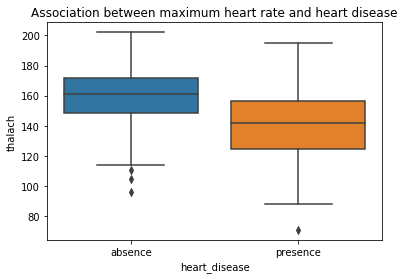

In [10]:
# Predictors of heart disease, maximum heart rate
sns.boxplot(data=heart, x='heart_disease', y='thalach')
plt.title('Association between maximum heart rate and heart disease')
plt.show()

In [11]:
# Create subsets of maximum heart rate for patients with/without HD
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

# mean difference 
diff_avg = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print("Difference of the mean of the maximum heart rate between people with and without heart disease:", diff_avg)

# median difference
diff_med = np.median(thalach_no_hd) - np.median(thalach_hd)
print("Difference of the median of the maximum heart rate between people with and without heart disease:", diff_med)

Difference of the mean of the maximum heart rate between people with and without heart disease: 19.11905597473242
Difference of the median of the maximum heart rate between people with and without heart disease: 19.0


In [12]:
# Two-sample t-test, maximum heart rate and heart disease
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print("P-value for Maximum Heart Rate and Heart Disease association:", pval)

P-value for Maximum Heart Rate and Heart Disease association: 3.456964908430172e-14


Given that the p-value is less than the significance threshold of 0.05, we reject the null hypothesis and conclude that there is a significant difference in the maximum heart rate between people with and people without heart disease.

In [13]:
# Two_sample t-test, Cholesterol and heart disease
chol_hd
chol_no_hd = no_hd.chol
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print("P-value for Cholesterol and Heart Disease association:", pval)

P-value for Cholesterol and Heart Disease association: 0.13914167020436527


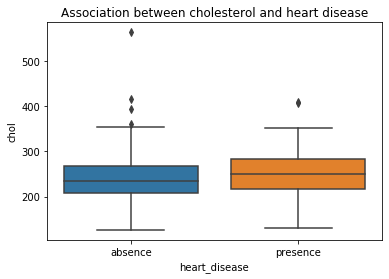

In [14]:
# Predictors of heart disease, cholesterol
plt.clf()
sns.boxplot(data=heart, x='heart_disease', y='chol')
plt.title('Association between cholesterol and heart disease')
plt.show()

Given the pval of 0.139 for the association between cholesterol and heart disease, which is greater than the 0.05 significance threshold, we can determine that cholesterol is not significantly associated with heart disease.

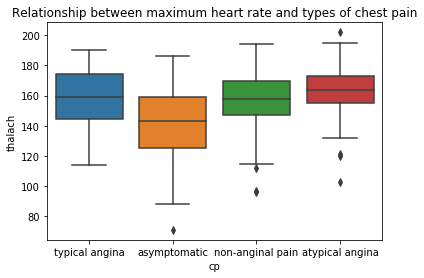

In [15]:
# Visualize two predictors, cp and thalach
plt.clf()
sns.boxplot(data=heart, x='cp', y='thalach')
plt.title("Relationship between maximum heart rate and types of chest pain")
plt.show()

In [16]:
# Create subsets for maximum heart rate for populations for each type of chest pain
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

In [17]:
# ANOVA test, types of chest pain and maximum heart rate
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print("P-value for forms of chest pain regarding maximum heart rate:", pval)

P-value for forms of chest pain regarding maximum heart rate: 1.9065505247705008e-10


Given that the pval in the ANOVA test for chest pain and maximum heart rate is 1.9e-10, which is less than the significance threshold of 0.05, we will reject the null hypothesis that states that all people have the same average maximum heart rate. There is at least one pair of chest pain types that have significantly different maximum heart rates during exercise.

In [18]:
# Tukey's range test, maximum heart rate and chest pain
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


According to the Tukey results, we can determine that the following pairs of chest pain types have significantly different maximum heart rates: asymptomatic and atypical angina; asymptomatic and non-anginal pain; asymptomatic and typical angina. 

In [19]:
# Contingency table, chest pain versus heart disease
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print("Contingency table of chest pain and heart disease")
print(Xtab)

Contingency table of chest pain and heart disease
heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [20]:
# Chi-square test, chest pain and heart disease diagnosis
chi2, pval, dof, expected = chi2_contingency(Xtab)
print("P-value between chest pain and diagnosis of heart disease:", pval)

P-value between chest pain and diagnosis of heart disease: 1.2517106007837527e-17


Given the pvalue of 1.25e-17, which is less than the significance threshold of 0.05, we will reject the null hypothesis and determine that there is a significant association between the chest pain type and heart disease.